In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [103]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [104]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [106]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [108]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


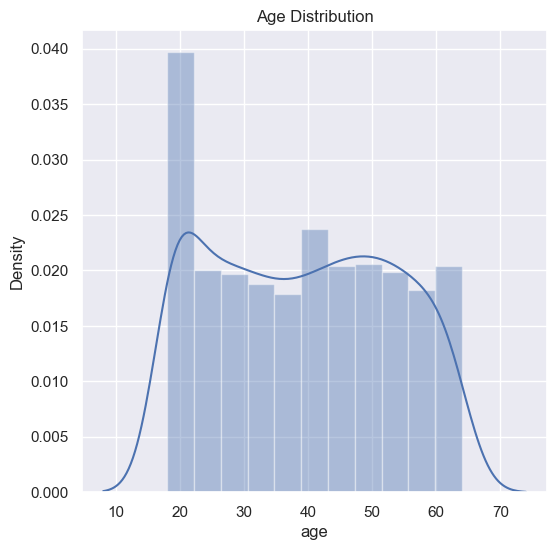

In [109]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

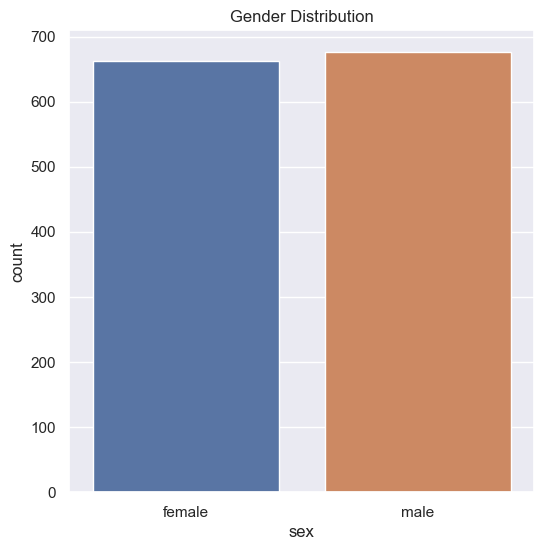

In [110]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Gender Distribution')
plt.show()

In [111]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

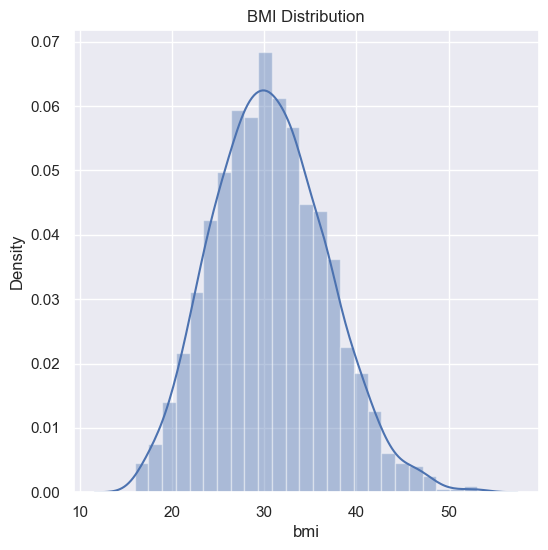

In [112]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

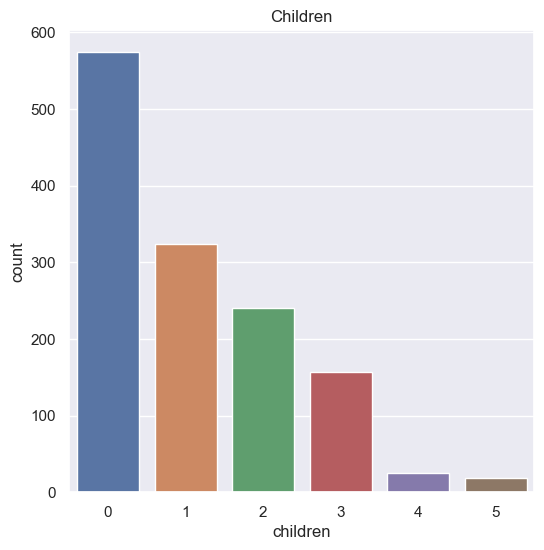

In [113]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [114]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

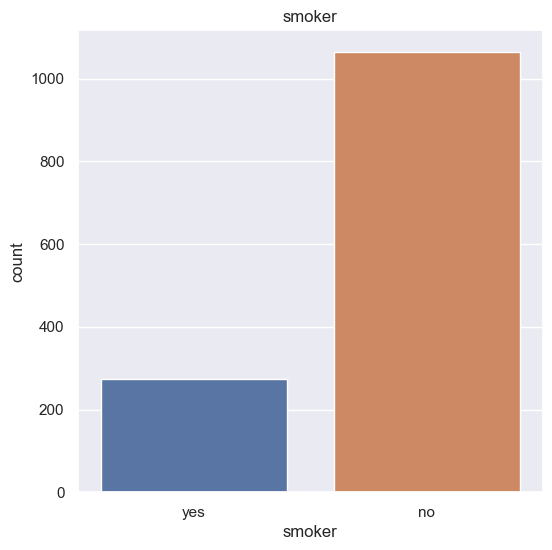

In [115]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [116]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

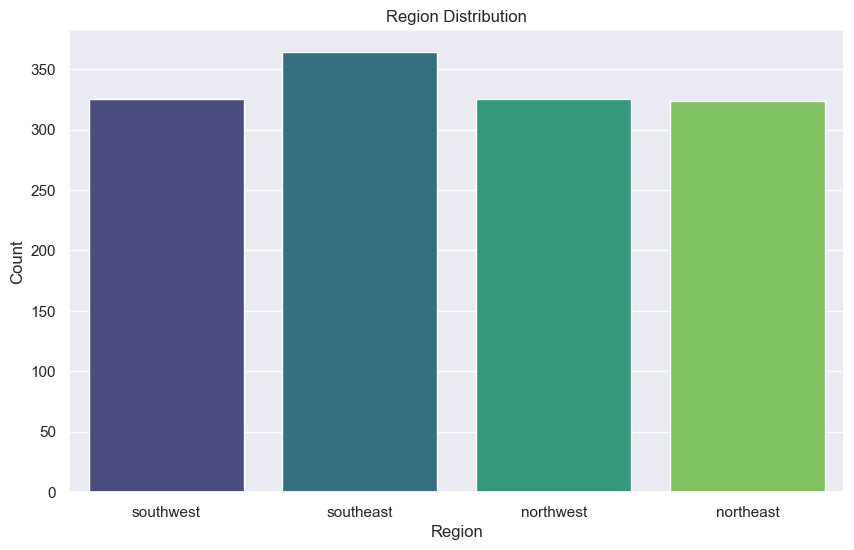

In [117]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=insurance_dataset, palette='viridis')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


In [118]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

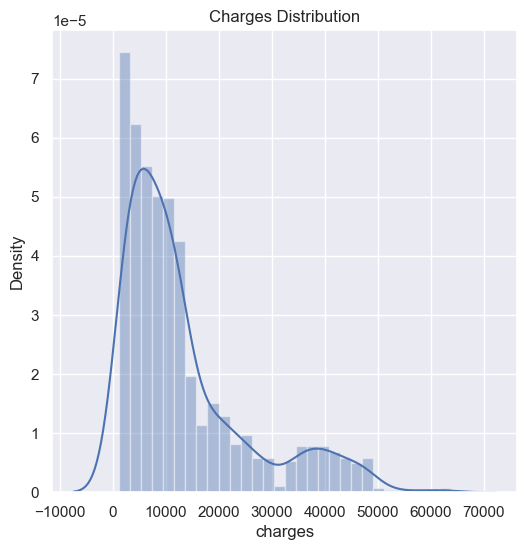

In [119]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [120]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [121]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [122]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [123]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (936, 6) (402, 6)


In [132]:
# loading the Linear Regression model
regressor = LinearRegression()

regressor.fit(X_train, Y_train)

LinearRegression()

In [133]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7415730843556845


In [134]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7661186068101191


In [159]:
# Initialize and fit the DecisionTreeRegressor
model_DT = DecisionTreeRegressor(max_depth=5, min_samples_split=2, random_state=42)
model_DT.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [160]:
# prediction on training data
training_data_prediction_DT =model_DT.predict(X_train)

# R squared value
r2_train_DT = metrics.r2_score(Y_train, training_data_prediction_DT)
print('R squared value : ', r2_train_DT)

R squared value :  0.8765961840939065


In [161]:
# prediction on test data
test_data_prediction_DT =model_DT.predict(X_test)

# R squared value
r2_test_DT = metrics.r2_score(Y_test, test_data_prediction_DT)
print('R squared value : ', r2_test_DT)

R squared value :  0.8671227239304921


In [139]:
# Initialize and fit the RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators=10, random_state=42)
model_RF.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [140]:
# prediction on training data
training_data_prediction_RF =model_RF.predict(X_train)

# R squared value
r2_train_RF = metrics.r2_score(Y_train, training_data_prediction_RF)
print('R squared value : ', r2_train_RF)

R squared value :  0.9659992029644128


In [141]:
# prediction on test data
test_data_prediction_RF=model_RF.predict(X_test)

# R squared value
r2_test_RF = metrics.r2_score(Y_test, test_data_prediction_RF)
print('R squared value : ', r2_test_RF)

R squared value :  0.8432934378803693


In [156]:
#Fit KNN Model
model_knn = KNeighborsRegressor(n_neighbors=51)  # Initialize KNN regressor with 5 neighbors
model_knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=51)

In [157]:
# prediction on training data
training_data_prediction_knn =model_knn.predict(X_train)

# R squared value
r2_train_knn = metrics.r2_score(Y_train, training_data_prediction_knn)
print('R squared value : ', r2_train_knn)

R squared value :  0.13180507252872198


In [158]:
# prediction on test data
test_data_prediction_knn=model_knn.predict(X_test)

# R squared value
r2_test_knn = metrics.r2_score(Y_test, test_data_prediction_knn)
print('R squared value : ', r2_test_knn)

R squared value :  0.162706826386376


In [150]:
#Fit SVR Model
model_svr = SVR(kernel='linear', C=100)  # Initialize SVR with RBF kernel
model_svr.fit(X_train, Y_train)  

SVR(C=100, kernel='linear')

In [151]:
# prediction on training data
training_data_prediction_svr = model_svr.predict(X_train)

# R squared value
r2_train_svr = metrics.r2_score(Y_train, training_data_prediction_svr)
print('R squared value : ', r2_train_svr)

R squared value :  0.5134586210815333


In [152]:
# prediction on test data
test_data_prediction_svr=model_svr.predict(X_test)

# R squared value
r2_test_svr = metrics.r2_score(Y_test, test_data_prediction_svr)
print('R squared value : ', r2_test_svr)

R squared value :  0.5344740715142369


In [162]:
models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor','KNN', 'SVR']
r2_train = [0.74, 0.87, 0.96, 0.13, 0.51]  # Training R2 scores
r2_test = [0.76, 0.86, 0.84, 0.16, 0.53]   # Test R2 scores


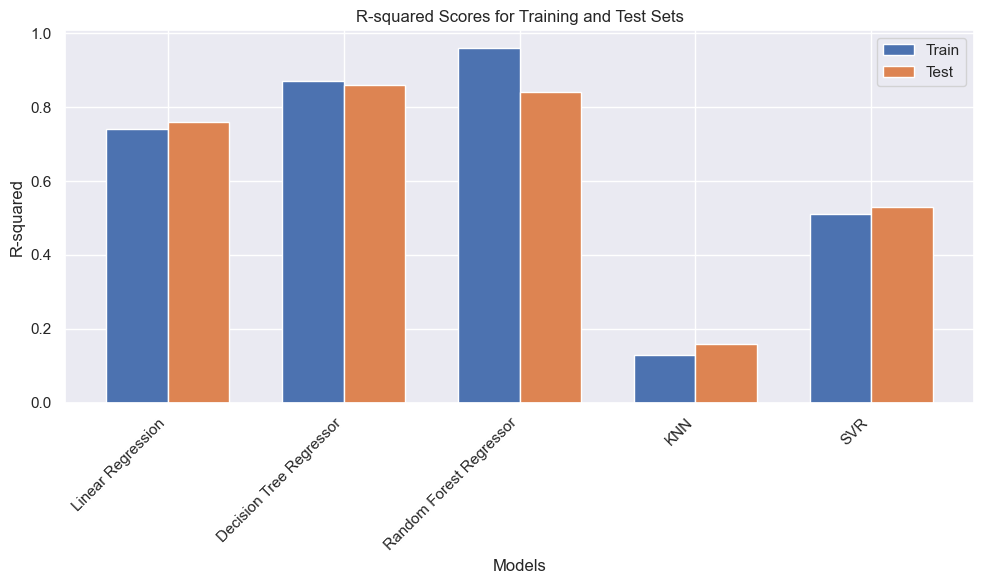

In [163]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

bar1 = ax.bar(index, r2_train, bar_width, label='Train')
bar2 = ax.bar(index + bar_width, r2_test, bar_width, label='Test')

ax.set_xlabel('Models')
ax.set_ylabel('R-squared')
ax.set_title('R-squared Scores for Training and Test Sets')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [38]:
# Define the model and parameters
model_param = {
    'LinearRegression': {
        'model': LinearRegression(),
        'param': {}
    },
    'Ridge': {
        'model': Ridge(),
        'param': {
            'alpha': [0.5, 0.75]
        }
    },
    'Lasso': {
        'model': Lasso(fit_intercept=True, precompute=False, warm_start=False, positive=False, random_state=None, selection='cyclic'),
        'param': {
            'alpha': [0.2, 0.3, 0.5],
            'tol': [0.0001, 0.001, 0.01, 0.1]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'param': {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'param': {
            'n_neighbors': [5, 10, 15, 20, 25]
        }
    },
    'SVR': {
        'model': SVR(),
        'param': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1, 5, 10, 20, 30, 50, 80, 100]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'param': {
            'criterion': ['squared_error', 'absolute_error'],
            'n_estimators': [1000, 1200, 1500, 2000, 3000]
        }
    }
}

# Perform GridSearchCV
scores = []
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'], param_grid=mp['param'], cv=5, return_train_score=False)
    model_selection.fit(X_train, Y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

df_model_score = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df_model_score)


                   model  best_score  \
0       LinearRegression    0.735726   
1                  Ridge    0.735854   
2                  Lasso    0.735732   
3  DecisionTreeRegressor    0.699591   
4    KNeighborsRegressor    0.102799   
5                    SVR    0.510354   
6          random_forest    0.829603   

                                         best_params  
0                                                 {}  
1                                    {'alpha': 0.75}  
2                         {'alpha': 0.5, 'tol': 0.1}  
3                      {'criterion': 'friedman_mse'}  
4                                {'n_neighbors': 20}  
5                     {'C': 100, 'kernel': 'linear'}  
6  {'criterion': 'squared_error', 'n_estimators':...  


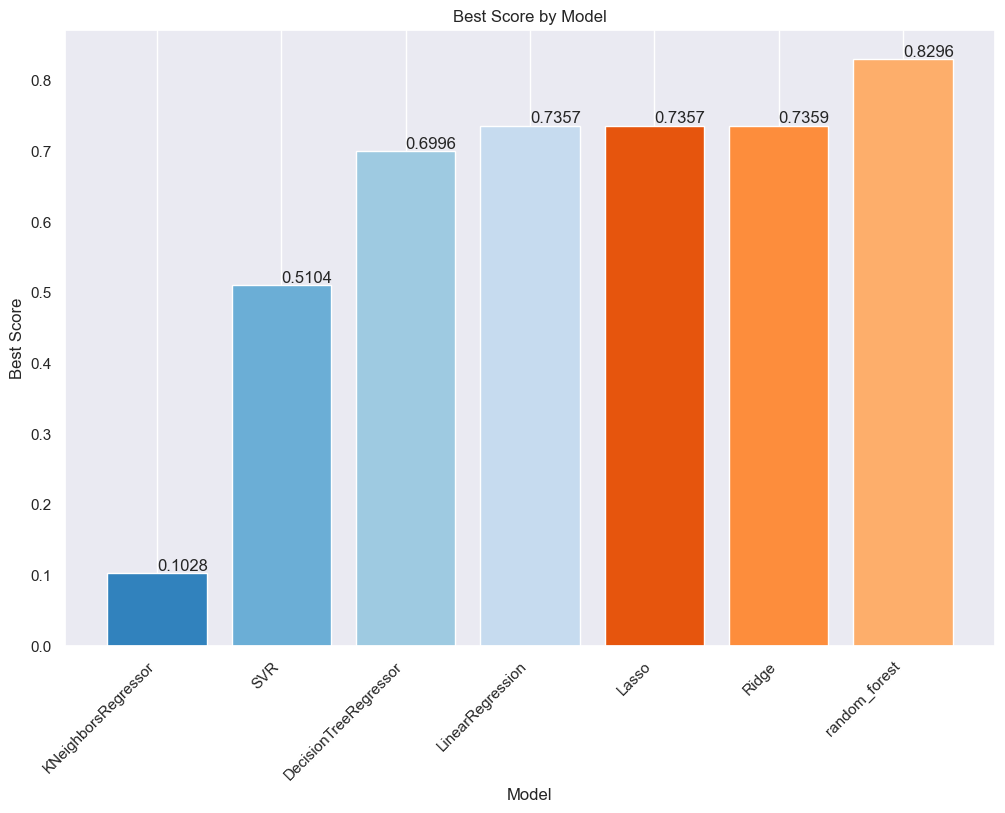

In [44]:
df_model_score = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Sort the DataFrame by the best score in ascending order
df_model_score_sorted = df_model_score.sort_values(by='best_score', ascending=True)

# Define a color map
colors = plt.cm.tab20c.colors  # You can choose any colormap you like

# Plot the results
plt.figure(figsize=(12, 8))
bars = plt.bar(df_model_score_sorted['model'], df_model_score_sorted['best_score'], color=colors)

plt.ylabel('Best Score')
plt.xlabel('Model')
plt.title('Best Score by Model')
plt.xticks(rotation=45, ha='right')  # Rotate model names for better readability
plt.grid(axis='y')

# Add the score values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom')

plt.show()
